In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
banda = pd.read_csv('band_CsPbBr3.txt', sep = ' ')
pdos = pd.read_csv('pdos.txt', sep = ' ')


In [58]:
def get_indx(lst, element):
    return [index for index, value in enumerate(lst) if value == element]

indices = list(set(banda['k']))
indices.sort()
bandas = {}
bandas['k'] = indices
ncol = list(banda['k']).count(indices[0])
for i in range(ncol):
    bandas['e'+str(i)] = []
for i in indices:
    pos = get_indx(banda['k'], i)
    lista_energias = [banda['E'][p] for p in pos]
    for n in range(ncol):
        bandas['e'+str(n)].append(lista_energias[n])
bandas = pd.DataFrame(bandas)
bandas

,k,e0,e1,e2,e3,e4,e5,e6,e7,e8,...,e16,e17,e18,e19,e20,e21,e22,e23,e24,e25
0,0.0000,-18.1317,-13.5082,-13.5082,-13.3805,-13.3805,-13.3805,-11.2904,-10.6615,-10.6615,...,1.2989,1.2989,1.2989,1.3978,1.3978,1.3978,6.3776,7.5395,7.5395,8.2866
1,0.0042,-18.1317,-13.5082,-13.5078,-13.3804,-13.3804,-13.3804,-11.2898,-10.6627,-10.6615,...,1.2982,1.2982,1.2982,1.3970,1.3970,1.3971,6.3837,7.5432,7.5442,8.2896
2,0.0084,-18.1317,-13.5081,-13.5069,-13.3804,-13.3804,-13.3804,-11.2879,-10.6662,-10.6615,...,1.2959,1.2962,1.2962,1.3949,1.3949,1.3951,6.4019,7.5541,7.5583,8.2946
3,0.0126,-18.1316,-13.5082,-13.5055,-13.3805,-13.3805,-13.3804,-11.2848,-10.6721,-10.6614,...,1.2923,1.2928,1.2928,1.3913,1.3913,1.3921,6.4319,7.5721,7.5816,8.3045
4,0.0168,-18.1316,-13.5082,-13.5034,-13.3806,-13.3806,-13.3805,-11.2804,-10.6802,-10.6614,...,1.2873,1.2881,1.2881,1.3866,1.3866,1.3885,6.4733,7.5970,7.6137,8.3184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.5277,-18.1308,-13.5011,-13.4541,-13.3817,-13.3816,-13.3808,-11.0874,-10.9434,-10.6872,...,0.9882,1.2150,1.2296,1.3383,1.3578,1.9400,5.7625,7.9150,8.0975,8.1467
97,0.5336,-18.1308,-13.5042,-13.4553,-13.3817,-13.3816,-13.3807,-11.0935,-10.9433,-10.6755,...,1.0321,1.1919,1.2610,1.3123,1.3239,1.9234,5.8002,7.8632,8.2397,8.3013
98,0.5395,-18.1309,-13.5065,-13.4562,-13.3817,-13.3816,-13.3807,-11.0980,-10.9433,-10.6670,...,1.0771,1.1747,1.2659,1.2849,1.3135,1.9113,5.8278,7.8221,8.3412,8.4172
99,0.5455,-18.1309,-13.5079,-13.4567,-13.3817,-13.3817,-13.3807,-11.1007,-10.9433,-10.6618,...,1.1228,1.1639,1.2194,1.2999,1.3072,1.9039,5.8446,7.7958,8.3953,8.4891


In [87]:
DOS = pdos['dos(E)']
E = pdos['E(eV)']

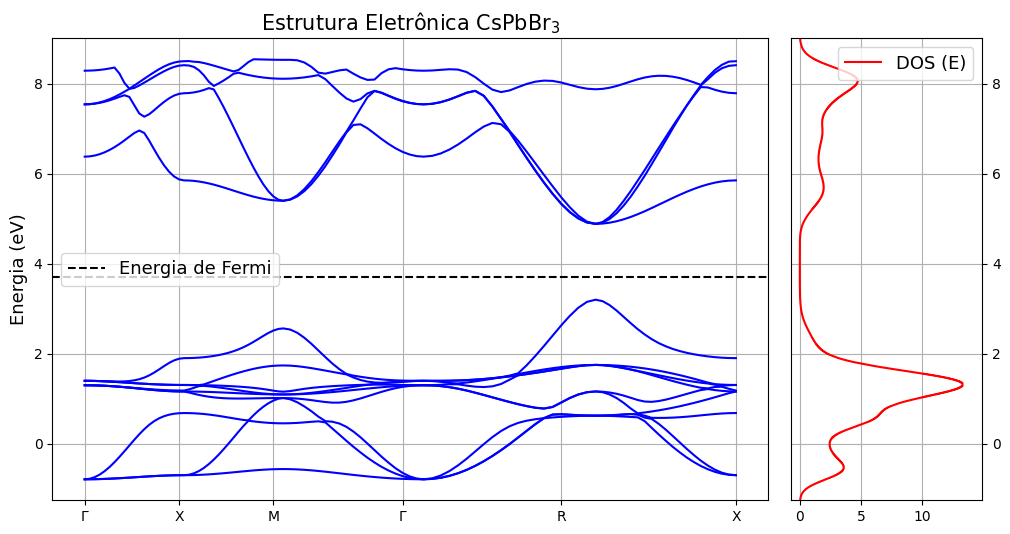

In [106]:
k_nodes = [indices[0], indices[19], indices[38], indices[57], indices[76], indices[-1]]

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,ncol):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'])
ax.grid('--')
ax.set_title(r'Estrutura Eletrônica CsPbBr$_3$', fontsize = 15)
ax.axhline(3.7060, linestyle = '--', color = '0', label = 'Energia de Fermi')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energia (eV)', fontsize = 13)


ax_dos.plot(DOS, E, color='red', linewidth=1.5, label='DOS (E)')
ax_dos.yaxis.set_label_position("right")
ax_dos.set_ylim(ax.get_ylim())  # Align the y-axes
ax_dos.legend(loc='upper right', fontsize = 13)
ax_dos.grid('--')
#ax_dos.set_xlabel('DOS', fontsize=13)
ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
plt.savefig('banda_CsPbBr3.png', dpi = 200)